<a href="https://colab.research.google.com/github/TamaDioo/Pembelajaran-Mesin/blob/main/TG1_2_3_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 13 - Artificial Neural Network

Nama: Dio Andika Pradana Mulia Tama

NIM: 2341720098

Kelas: TI-3F

## Lab 1
Klasifikasi Bunga Iris dengan Perceptron

### Deskripsi

Pada praktikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk menambah pemahaman Anda terkait dengan model Perceptron, pada praktikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Langkah 2 - Load Data dan Visualisasi

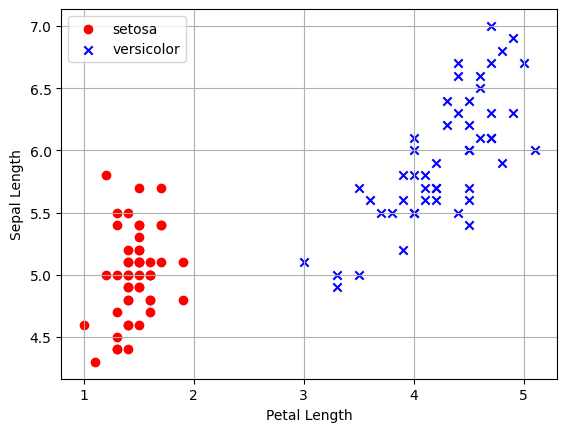

In [ ]:
df = pd.read_csv('iris.csv', header=0)
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

plt.scatter(setosa['petal length (cm)'], setosa['sepal length (cm)'], color='red', marker='o', label='setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['sepal length (cm)'], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan Encoding Label

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai Error Per Epoch

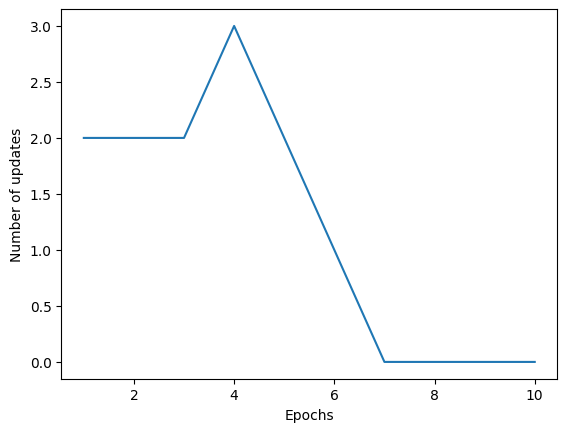

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualisasi Decision Boundary

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

/tmp/ipython-input-2544099898.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


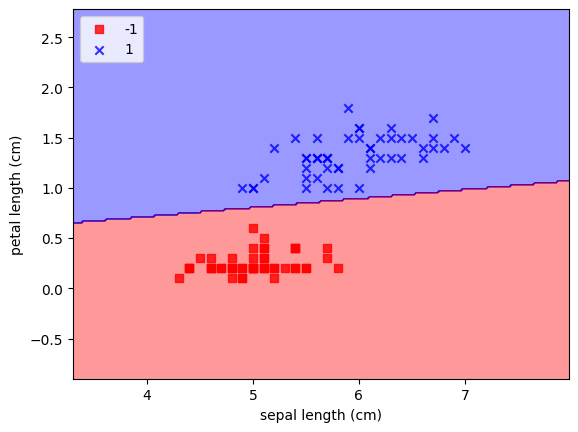

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

## Lab 2
Nilai Logika XOR dengan MLP

### Deskripsi
Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika *XOR*. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

### Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

### Langkah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Lab 3
Klasifikasi Churn Rate dengan ANN

### Deskripsi
Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istilah populer dari fenomena ini disebut sebagai '*churn*'. Tingkat churn yang tinggi (*chrun rate*) akan berdampak tidak baik bagi perusahaan.

## Pra Pengolahan Data

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5880 - loss: 0.7031
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.5106
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4760
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4317
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4324
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.4156
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4103
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4056
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4106
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3944
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.4134
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Membuat Prediksi

Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: \$ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: \$ 50000

Apakah customer tersebut perlu dipertahankan?

## Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[False]]


Apakah hasilnya **False**?

Ya, hasilnya False.

## Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1525   70]
 [ 198  207]]


0.866

## Lab 4
Klasifikasi Siang dan Malang dengan ANN

### Pengantar
Pada lab ini, mahasiswa akan mempelajari cara membangun model klasifikasi citra siang dan malam menggunakan **Artificial Neural Network (ANN)**. Model akan dilatih menggunakan **fitur HOG (Histogram of Oriented Gradients)** yang diekstraksi dari citra. Mahasiswa akan menjalani alur lengkap mulai dari membaca data, pra pengolahan citra, ekstraksi fitur, normalisasi, membangun model, hingga evaluasi.

### Dataset
Gunakan dataset citra siang dan malam pada lab [Lab 5](https://polinema.gitbook.io/jti-modul-praktikum-pembelajaran-mesin-mah/js11-klasifikasi-2/lab-5)

### Langkah 1 - Import Library
Import library yang dibutuhkan

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

### Langkah 2 - Load Dataset

Gunakan fungsi berikut dan load dataset. Pastikan direktori dataset telah sesuai.

In [ ]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/ML/images/training/"
test_dir = "/content/drive/MyDrive/ML/images/test/"

# train_dir = "images/training/"
# test_dir  = "images/test/"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Langkah 2 - Pra Pengolahan

Risize dan lakukan pelabelan data

In [ ]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

### Langkah 3 - Ekstraksi Fitur

Selanjut, lakukan proses ekstraksi fitur. Fitur yang akan digunakan adalah HoG. Pelajari HoG lebih lanjut pada https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_hog.html

In [ ]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

### Langkah 4 - Standardisasi Fitur

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

### Langkah 5 - Buat Data Latih dan Validasi

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

### Langkah 6 - Buat Model ANN
Arsitektur model yang digunakan adalah,

- Input Layer
- Hidden Layer 1 - 128 Nodes - ReLU
- Hidden Layer 2 - 64 Nodes - ReLu
- Output Layer - 2 Nodes - Sigmoid

In [ ]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

### Langkah 7 - Latih Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.7753 - loss: 0.6189 - val_accuracy: 0.9583 - val_loss: 0.2787
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9878 - loss: 0.0421 - val_accuracy: 0.9792 - val_loss: 0.3533
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.9950 - loss: 0.0624 - val_accuracy: 0.9792 - val_loss: 0.3841
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9985 - loss: 0.0025 - val_accuracy: 0.9792 - val_loss: 0.4570
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 1.0921e-04 - val_accuracy: 0.9792 - val_loss: 0.5081
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 1.0000 - loss: 4.3131e-06 - val_accuracy: 0.9792 - val_loss: 0.5378
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 1.0000 - loss: 1.1641e-06 - val_accuracy: 0.9792 - val_loss: 0.5548
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 1.0000 - loss: 4.3371e-07 - val_accuracy: 0.

Anda dapat mengakses ulang performansi model dengan menggunakan variabel `history` yang telah dibuat.

### Langkah 8 - Evaluasi Model dengan Data Test

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8893 - loss: 1.4443
Akurasi Test: 0.875


### Langkah 9 - Buat Laporan Performansi Model

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        80
           1       0.88      0.88      0.88        80

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

[[70 10]
 [10 70]]


### Langkah 10 - Visualisasi Proses Training

Visualisasi ini penting untuk proses monitoring performa model. Visualisasi menggunakan konsep Receiver Operating Characteristic (ROC) untuk mengetahui performa model tiap epoch.

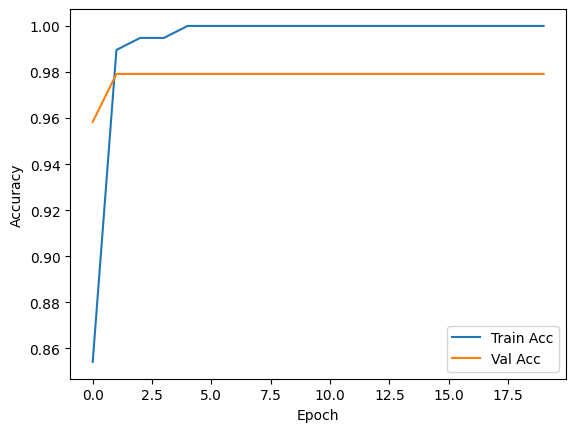

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dari grafik tersebut, apa yang bisa Anda interpretasikan?

Berdasarkan grafik tersebut, performa model terlihat sangat baik.
* **Training Accuracy** mencapai nilai sempurna **1.0 (100%)** mulai dari sekitar *epoch* ke-4 dan bertahan stabil hingga akhir.
* **Validation Accuracy** stabil di angka sekitar **0.98 (98%)**. Angka ini sangat tinggi untuk sebuah model klasifikasi.

Model belajar dengan sangat cepat. Lonjakan drastis terjadi dari *epoch* 0 ke *epoch* 1. Hanya dalam 1-2 *epoch*, model sudah mencapai potensi maksimalnya. Tetapi, ada tanda-tanda *overfitting*, meskipun tidak parah:
* Setelah *epoch* ke-4, akurasi *training* mencapai 100% (model menghafal data latih dengan sempurna), sedangkan akurasi *validation* tertahan di 98%.
* Adanya celah (*gap*) antara garis biru (1.0) dan oranye (0.98) menunjukkan bahwa model bekerja sedikit lebih baik pada data yang sudah pernah dilihatnya (training) dibandingkan data baru (validation). Namun, karena *validation accuracy* tetap tinggi dan tidak menurun, ini adalah kondisi yang dapat diterima (acceptable).

Jadi, model ini sudah siap digunakan (good to go) karena akurasi validasinya sangat tinggi (98%).

### Langkah 11 - Simpan Model

Simpan model untuk kebutuhan produksi.

In [ ]:
model.save('day_night_classifier_model.h5')

# Tugas Lab

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktivasi
- ANN diimplementasikan dengan menggunakan `tensorflow`.

In [ ]:
# Import library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load dataset MNIST
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Cek shape data
print("Shape X_train:", X_train_mnist.shape)
print("Shape y_train:", y_train_mnist.shape)
print("Shape X_test:", X_test_mnist.shape)
print("Shape y_test:", y_test_mnist.shape)

Shape X_train: (60000, 28, 28)
Shape y_train: (60000,)
Shape X_test: (10000, 28, 28)
Shape y_test: (10000,)


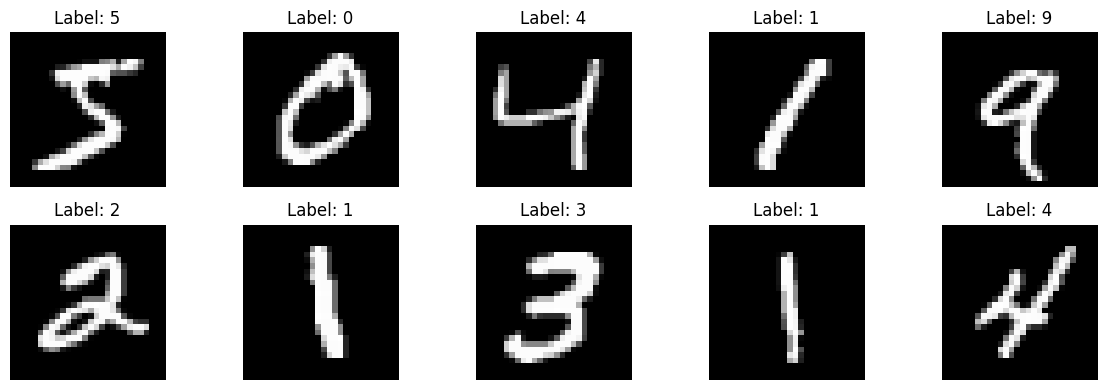

In [ ]:
# Visualisasi 10 sample gambar pertama
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_mnist[i], cmap='gray')
    plt.title(f'Label: {y_train_mnist[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Flatten gambar dari 28x28 menjadi 784
X_train_flat = X_train_mnist.reshape(-1, 28*28)
X_test_flat = X_test_mnist.reshape(-1, 28*28)

# Normalisasi nilai piksel ke range [0, 1]
X_train_norm = X_train_flat.astype('float32') / 255.0
X_test_norm = X_test_flat.astype('float32') / 255.0

# Convert label ke one-hot encoding
y_train_onehot = to_categorical(y_train_mnist, 10)
y_test_onehot = to_categorical(y_test_mnist, 10)

print("Shape X_train setelah preprocessing:", X_train_norm.shape)
print("Shape y_train setelah one-hot encoding:", y_train_onehot.shape)
print("Contoh label sebelum one-hot:", y_train_mnist[0])
print("Contoh label setelah one-hot:", y_train_onehot[0])

Shape X_train setelah preprocessing: (60000, 784)
Shape y_train setelah one-hot encoding: (60000, 10)
Contoh label sebelum one-hot: 5
Contoh label setelah one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Membuat model ANN dengan arsitektur berikut:
- Input Layer: 784 nodes (28x28 piksel)
- Hidden Layer 1: 256 nodes, ReLU activation
- Dropout Layer 1: 0.3 (untuk regularisasi)
- Hidden Layer 2: 128 nodes, ReLU activation
- Dropout Layer 2: 0.3
- Hidden Layer 3: 64 nodes, ReLU activation
- Output Layer: 10 nodes, Softmax activation (untuk 10 digit: 0-9)

In [ ]:
# Membuat model Sequential
model_mnist = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model_mnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_mnist.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training model dengan validation split
history_mnist = model_mnist.fit(
    X_train_norm, y_train_onehot,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7484 - loss: 0.7964 - val_accuracy: 0.9557 - val_loss: 0.1576
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9424 - loss: 0.1975 - val_accuracy: 0.9648 - val_loss: 0.1158
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9569 - loss: 0.1425 - val_accuracy: 0.9682 - val_loss: 0.1054
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9650 - loss: 0.1176 - val_accuracy: 0.9717 - val_loss: 0.0974
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.0994 - val_accuracy: 0.9731 - val_loss: 0.0902
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9744 - loss: 0.0812 - val_accuracy: 0.9754 - val_loss: 0.0874
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9767 - loss: 0.0710 - val_accuracy: 0.9759 - val_loss: 0.0869
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9801 - loss: 0.0631 - val_accuracy: 

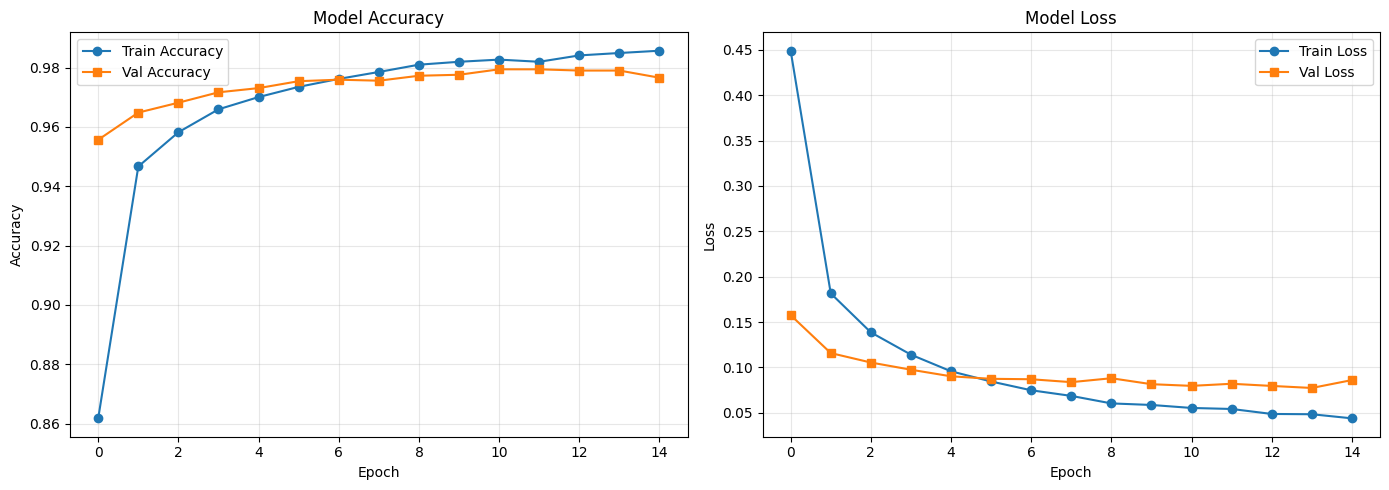

In [ ]:
# Plot accuracy dan loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax1.plot(history_mnist.history['accuracy'], label='Train Accuracy', marker='o')
ax1.plot(history_mnist.history['val_accuracy'], label='Val Accuracy', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot Loss
ax2.plot(history_mnist.history['loss'], label='Train Loss', marker='o')
ax2.plot(history_mnist.history['val_loss'], label='Val Loss', marker='s')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluasi model pada data test
test_loss, test_accuracy = model_mnist.evaluate(X_test_norm, y_test_onehot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Loss: 0.0721
Test Accuracy: 0.9804 (98.04%)


In [ ]:
# Prediksi pada data test
y_pred_prob_mnist = model_mnist.predict(X_test_norm)
y_pred_mnist = np.argmax(y_pred_prob_mnist, axis=1)

# Classification report
print("Classification Report:")
print("="*60)
print(classification_report(y_test_mnist, y_pred_mnist, target_names=[str(i) for i in range(10)]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



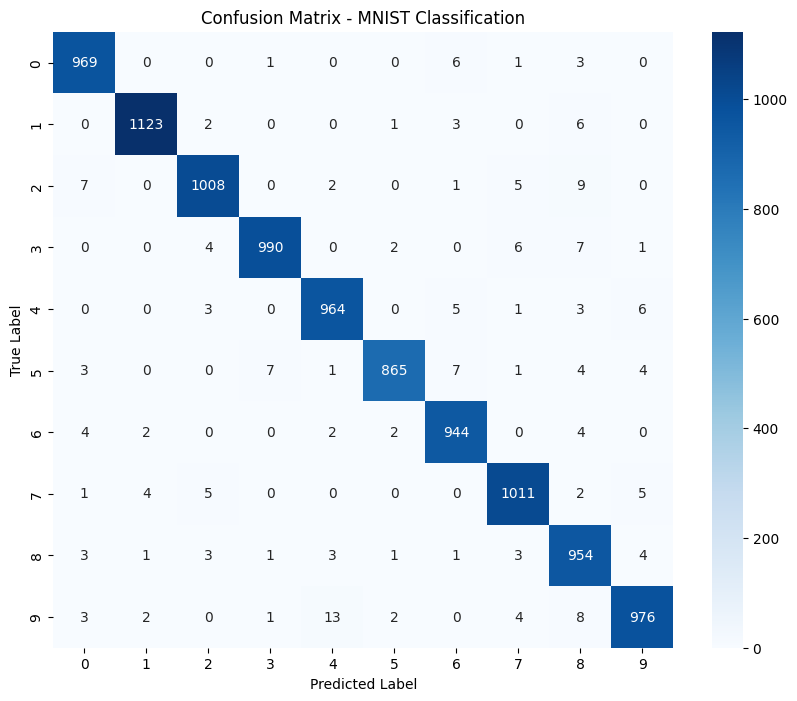

In [ ]:
# confusion matrix
cm_mnist = confusion_matrix(y_test_mnist, y_pred_mnist)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST Classification')
plt.show()

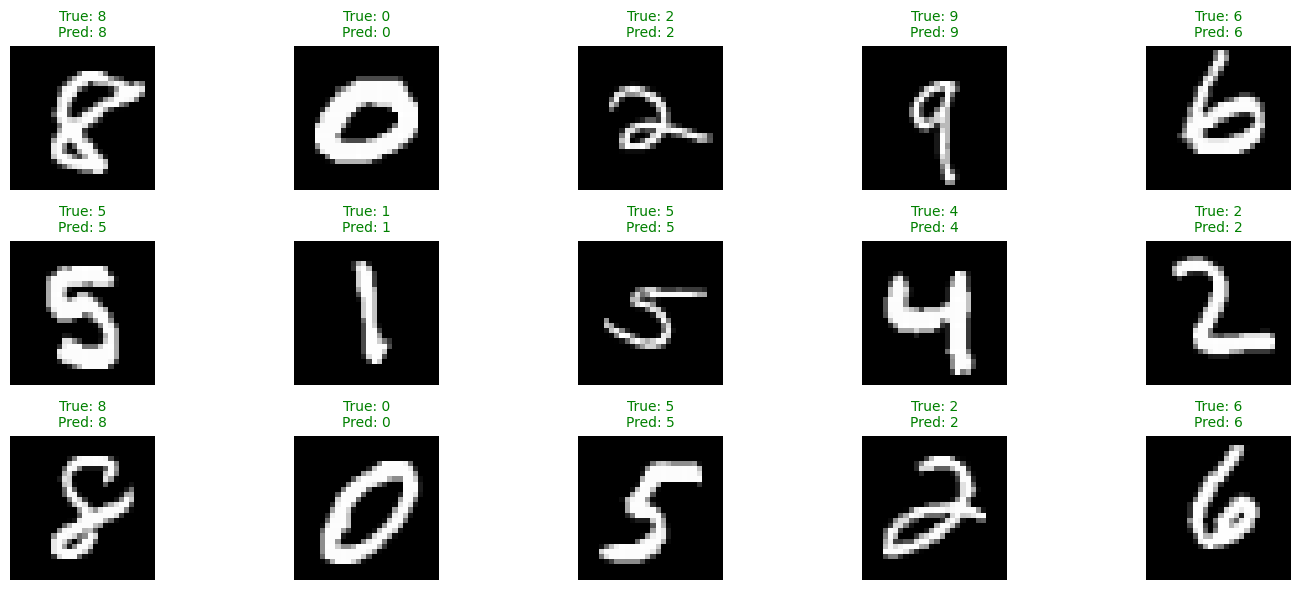

In [ ]:
# Visualisasi 15 prediksi sample secara acak
random_indices = np.random.choice(len(X_test_mnist), size=15, replace=False)

plt.figure(figsize=(15, 6))
for idx, i in enumerate(random_indices):
    plt.subplot(3, 5, idx+1)
    plt.imshow(X_test_mnist[i], cmap='gray')
    true_label = y_test_mnist[i]
    pred_label = y_pred_mnist[i]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Simpan model
model_mnist.save('mnist_classifier_model.h5')
print("Model berhasil disimpan sebagai 'mnist_classifier_model.h5'")

Model berhasil disimpan sebagai 'mnist_classifier_model.h5'


Eksplorasi yang telah saya lakukan:

1. **Pra Pengolahan**:
   - Normalisasi piksel ke range [0, 1]
   - Flatten gambar 28x28 menjadi vector 784 dimensi
   - One-hot encoding untuk label multi-class (10 digit)

2. **Arsitektur ANN**:
   - Input Layer: 784 nodes
   - Hidden Layer 1: 256 nodes (ReLU)
   - Dropout 1: 0.3 (mencegah overfitting)
   - Hidden Layer 2: 128 nodes (ReLU)
   - Dropout 2: 0.3
   - Hidden Layer 3: 64 nodes (ReLU)
   - Output Layer: 10 nodes (Softmax untuk multi-class)
   - Total Parameters: ~235000

3. **Fungsi Aktivasi**:
   - **ReLU** pada hidden layers: Mengatasi vanishing gradient, komputasi cepat
   - **Softmax** pada output layer: Menghasilkan probabilitas untuk 10 kelas (digit 0-9)

4. **Optimizer & Loss Function**:
   - Optimizer: **Adam** (adaptive learning rate)
   - Loss: **Categorical Crossentropy** (untuk multi-class classification)

__Hasil__:
- **Test Accuracy**: 98.04%
- Model berhasil mengklasifikasi digit tulisan tangan dengan akurasi sangat tinggi (98.04%)
- Dropout layers membantu mencegah overfitting
- Model konvergen dengan baik dalam 15 epoch